# 1) 사전 준비   
- 모듈 다운   
pip install opencv-python
pip install cmake     
pip install dlib     

- 사진 다운   
[고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

In [2]:
# 모듈 불러오기
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import os

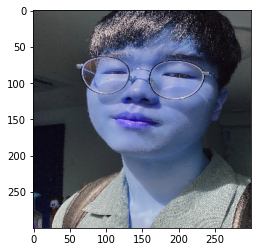

In [3]:
# 내 셀카 사진 불러오기
import os
my_image_path = os.getenv('HOME')+'/aiffel/sticker_data/IMG_1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (300, 300))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

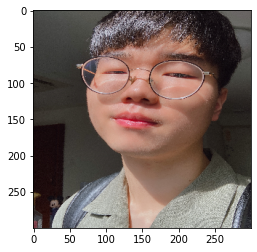

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 2) 얼굴 검출 & 랜드마크 검출
- 얼굴 검출

In [5]:
#dlib를 활용해 hog detector 선언
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

#detector를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(56, 15) (242, 201)]]


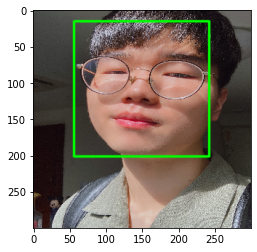

In [6]:
#찾은 얼굴 화면에 출력
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 랜드마크 검출

In [7]:
#저장한 landmark 모델 불러오기
import dlib
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


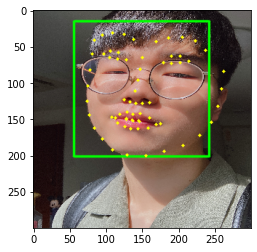

In [9]:
#랜드마크를 영상에 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3) 스티커 적용 위치 확인하기
[hint] 2, 36, 48, 30 번 인덱스를 이용    
- 수염사진의 중앙이 코 중앙인 33번에 위차하도록 위치 설정   
- top : x- w//2   
- left: y- h//2

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # whiskers center index : 33
    x = landmark[33][0]
    y = landmark[33][1] 
    w =  dlib_rect.width()
    h =  dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(141, 128)
(x,y) : (141,128)
(w,h) : (187,187)


In [11]:
#고양이 수염 불러오기
import os
sticker_path = os.getenv('HOME')+'/aiffel/sticker_data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [12]:
# top, left 위치 설정
refined_x = x - w//2 # left
refined_y = y - h//2   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (48,35)


# 4. 스티커 적용하기

In [13]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

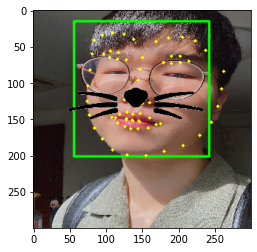

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- Bounding box, Landmark 제거

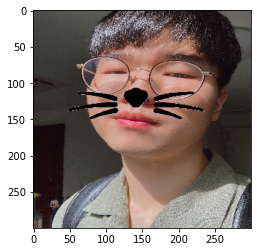

In [15]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 얼굴의 회전각도에 맞춰 회전하지 않아 어색한 고양이가 되었다...

In [31]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()  # cf. hog detecter 사용
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


In [32]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# for i in range(len(list_landmarks)):
#     print(i, list_landmarks[i])



68


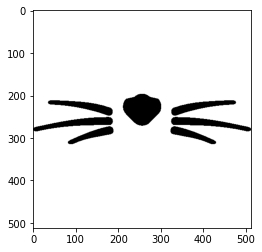

In [34]:
# 이미지 읽기
sticker_path = os.getenv('HOME')+'/aiffel/sticker_data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(img_sticker)
plt.show()

In [37]:
my_image_path = os.getenv('HOME')+'/aiffel/sticker_data/IMG_2.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (300, 300))    # 640x360의 크기로 Resize

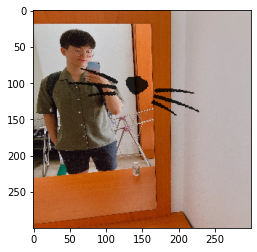

In [39]:
import math


# 각도 구하기

def getAngle(start, end):
  dx = end[0]-start[0]
  dy = end[1]-start[1]

  tan_theta = dx/dy
  theta = np.arctan(tan_theta)
  
  degree = theta * (180.0 / math.pi)  # radian to degree

  return degree


# 이미지 회전
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
 
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result


for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

  x = landmark[30][0]
  y = landmark[30][1]
  w = h = dlib_rect.width()



  refined_x = x - w // 2
  refined_y = y - h // 2
 


  if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
  if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0



  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  img_sticker = cv2.resize(img_sticker, (w,h))
  # print (img_sticker.shape)


  start = landmark[30]
  end = landmark[27]
  img_sticker = rotate_image(img_sticker, getAngle(start, end))


  alpha = 0.4  # 투명도
  sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
  img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, alpha, np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검정색)
  plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

plt.show()


# 6) 회고  

https://github.com/silvermaking/Aiffel/blob/master/E10%EC%B9%B4%EB%A9%94%EB%9D%BC%EC%8A%A4%ED%8B%B0%EC%BB%A4%EC%95%B1%EB%A7%8C%EB%93%A4%EA%B8%B0with_BTS.ipynb


https://github.com/HRPzz/AIFFEL/blob/main/EXPLORATION/Node_03/%5BE-03%5D%20Camera_Sticker_App.ipynb
이분의 코드 참고 했다 아직 전반적인 부분이 이해가 되지 않았지만 추후에 업데이트 하는 방향으로 가겠습니다. 
그리고 마지막 수염붙히기가 잘 안되었다 

